<a href="https://colab.research.google.com/github/Kovibordy/nero/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Данные варианта №147
data = np.array([
    [12.4711848 , 8.5064628 ],
    [ 2.88036585, 5.2652601 ],
    [12.52366909,11.70517783],
    [12.90371325,10.71484806],
    [20.01419988,18.19403671],
    [21.23306329,19.45839641],
    [12.03833448,10.92968797],
    [ 0.3979006 , 5.08473846],
    [12.27459829,12.45258706],
    [ 7.54559741, 1.33467655],
    [20.77375718,14.99530442],
    [-1.42202238, 5.33769983],
    [ 7.82526006, 0.63341691],
    [21.60489122,17.4311037 ],
    [ 7.44759299, 0.81467058],
    [11.79073849,12.45409673],
    [ 7.35287758, 0.76066289],
    [-0.85143929, 5.2383432 ],
    [ 7.84425818, 0.33866252],
    [ 1.37662994, 5.35821669],
    [11.65905345,13.21143665],
    [20.7679801 ,16.18052982],
    [ 1.81602931, 4.7507048 ],
    [ 0.15536372, 5.75176221],
    [12.87211427,10.70110177],
    [ 7.88347348, 1.81287796],
    [19.69057852,17.32149273],
    [ 7.36534983, 1.39429411],
    [12.77077133,12.14477594],
    [20.3630236 ,18.19601927],
    [ 7.07688231, 1.05524488],
    [20.63934337,21.03087243],
    [ 6.97208477, 1.22786687],
    [12.58958803, 8.34349023],
    [ 7.52604848, 1.40505024],
    [ 0.70780457, 4.86667201],
    [12.12117268,10.8083865 ],
    [18.68878656,19.99273264],
    [ 7.17519384, 1.02797549],
    [12.45386359,12.56826618],
    [ 2.92401377, 5.46090261],
    [19.41216451,18.23475465],
    [ 1.32065644, 4.81288597],
    [19.84633526,16.93999521],
    [ 7.59070784, 1.06877042],
    [ 1.96200583, 4.59528375],
    [12.67417503,10.41711915],
    [-0.11397628, 5.17224856],
    [ 7.58768086, 1.14356154],
    [ 7.90393137, 1.06048331],
    [ 6.78983848, 1.8421781 ],
    [20.49684671,18.40636758],
    [20.73772346,15.12711351],
    [12.07533766,12.19821361],
    [ 1.31703464, 5.18376154],
    [ 2.13431267, 5.17481191],
    [25.00750418,16.57638881],
    [20.13945018,18.41990835],
    [ 1.20658688, 6.38100288],
    [12.51564217,11.48016554]
])

In [ ]:
# Метод локтя для нахождения оптимального количества кластеров
inertia_values = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

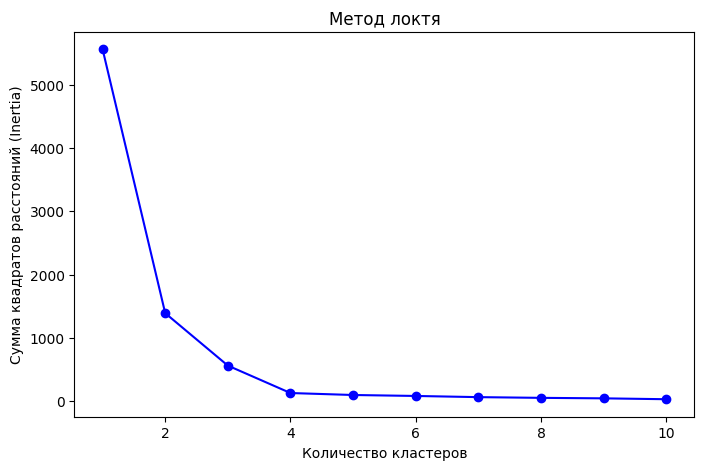

In [ ]:
# Визуализация метода локтя
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний (Inertia)')
plt.title('Метод локтя')
plt.show()

In [ ]:
# Оптимальное количество кластеров выбираем визуально, допустим, это 3 кластера
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Метки кластеров и центроиды
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
# Вывод информации
labelNum = np.unique(labels)
for v in labelNum:
    print(f"В кластере {v} содержится {np.sum(labels == v)} точек")

print("Координаты центроидов кластеров:")
print(centroids)

В кластере 0 содержится 30 точек
В кластере 1 содержится 15 точек
В кластере 2 содержится 15 точек
Координаты центроидов кластеров:
[[ 4.25660146  3.17848956]
 [20.62770987 17.76700108]
 [12.38226377 11.24238773]]


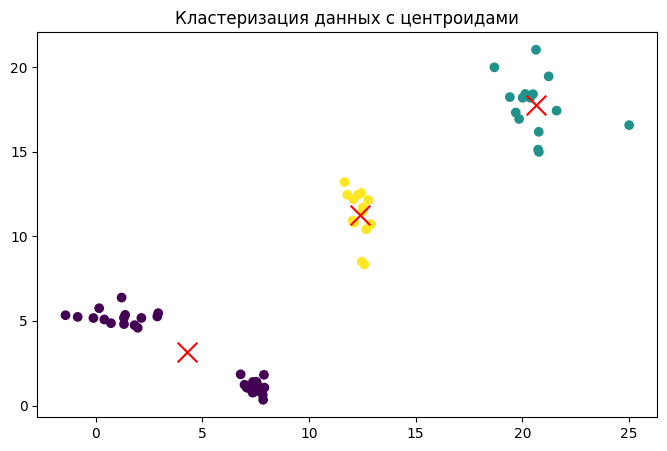

In [ ]:
# Визуализация кластеров и центроидов
plt.figure(figsize=(8, 5))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
plt.title('Кластеризация данных с центроидами')
plt.show()

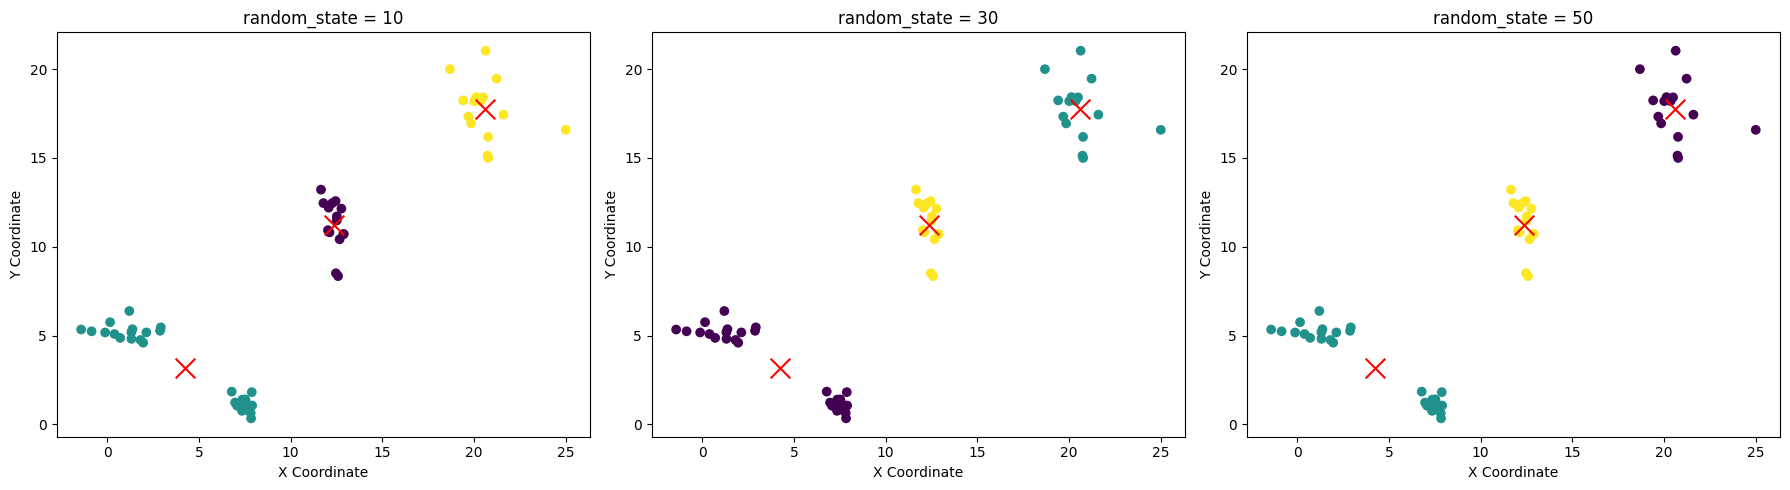

In [ ]:
# Визуализация для 3 разных random_state
random_states = [10, 30, 50]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, random_state in enumerate(random_states):
    kmeans = KMeans(n_clusters=3, random_state=random_state)
    kmeans.fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    axes[idx].scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
    axes[idx].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
    axes[idx].set_title(f'random_state = {random_state}')
    axes[idx].set_xlabel('X Coordinate')
    axes[idx].set_ylabel('Y Coordinate')

plt.tight_layout()
plt.show()